# 第4部　確率と確率分布の基本

## 3章　二項分布

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [3]:
# 書籍と結果を合わせるための乱数の種(必須ではありません)
np.random.seed(4)

### 実装：くじを1枚引くシミュレーション

#### くじを用意する

In [4]:
lottery = np.array([1,1,0,0,0,0,0,0,0,0])
lottery

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
# くじの当たり率（成功確率）
sum(lottery) / len(lottery)

0.2

#### くじを1枚引く

In [6]:
# ランダムにくじを引く
np.random.choice(lottery, size=1, replace=True)

array([0])

In [7]:
# ランダムにくじを3回引く
print(np.random.choice(lottery, size=1, replace=True))
print(np.random.choice(lottery, size=1, replace=True))
print(np.random.choice(lottery, size=1, replace=True))

[0]
[1]
[0]


### 実装：くじを10枚引くシミュレーション

#### くじを10枚引く

In [8]:
# ランダムにくじを10回引く
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 1 0]


#### 乱数の種を設定する

In [9]:
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))

[0 0 0 0 1 1 1 0 0 0]
[0 0 0 0 1 1 1 0 0 0]
[0 0 0 0 1 1 1 0 0 0]


#### 繰り返し実行の結果の確認

In [10]:
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))

[0 0 0 0 1 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 1]


In [11]:
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))

[0 0 0 0 1 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 1]


#### 当たり枚数の集計

In [12]:
# ランダムにくじを10枚引く
np.random.seed(1)
sample_1 = np.random.choice(lottery, size=10, replace=True)
print('くじ引きの結果：', sample_1)
print('当たり枚数　　：', np.sum(sample_1))

くじ引きの結果： [0 0 0 0 1 1 1 0 0 0]
当たり枚数　　： 3


### 実装：くじを10枚引く試行を10000回繰り返すシミュレーション

#### シミュレーションの実行

In [13]:
# くじを10枚引く試行を10000回繰り返す

# 試行回数
n_trial = 10000

# 結果を格納する入れ物
binomial_result_array = np.zeros(n_trial)

In [14]:
# シミュレーションの実行
np.random.seed(1)
for i in range(0, n_trial):
    sample = np.random.choice(lottery, size=10, replace=True)
    binomial_result_array[i] = np.sum(sample)

In [15]:
# シミュレーションの結果(最初の10回の結果)
binomial_result_array[0:10]

array([3., 0., 3., 2., 3., 1., 0., 2., 3., 0.])

#### シミュレーション結果のヒストグラム

In [16]:
# シミュレーションの結果の相対度数分布
np.histogram(binomial_result_array, 
             bins=np.arange(0, 11, 1), density=True)

(array([1.118e-01, 2.711e-01, 2.992e-01, 1.977e-01,
        8.890e-02, 2.430e-02, 5.800e-03, 1.100e-03,
        1.000e-04, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

<AxesSubplot:ylabel='Density'>

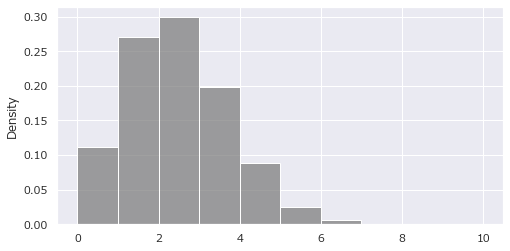

In [17]:
# シミュレーションの結果のヒストグラム
sns.histplot(binomial_result_array, 
             bins=np.arange(0, 11, 1), 
             stat='density', color='gray')

### 実装：二項分布

#### 二項分布の確率質量関数

In [18]:
# 二項分布の確率質量関数(成功確率p=0.5、ベルヌーイ試行の回数n=2、成功回数=1)
round(stats.binom.pmf(k=1, n=2, p=0.5), 3)

0.5

In [19]:
# 二項分布の確率質量関数(成功確率p=0.2、ベルヌーイ試行の回数n=10、成功回数=0)
round(stats.binom.pmf(k=0, n=10, p=0.2), 3)

0.107

#### 二項分布の確率質量関数のグラフ

In [20]:
# 成功回数が0～10回になる確率を各々計算

# 成功回数
n_success = np.arange(0, 11, 1)

# 確率
probs = stats.binom.pmf(k=n_success, n=10, p=0.2)

# データフレームにまとめる
probs_df = pd.DataFrame({
    'n_success': n_success,
    'probs': probs
})
print(probs_df)

    n_success         probs
0           0  1.073742e-01
1           1  2.684355e-01
2           2  3.019899e-01
3           3  2.013266e-01
4           4  8.808038e-02
5           5  2.642412e-02
6           6  5.505024e-03
7           7  7.864320e-04
8           8  7.372800e-05
9           9  4.096000e-06
10         10  1.024000e-07


<AxesSubplot:ylabel='Density'>

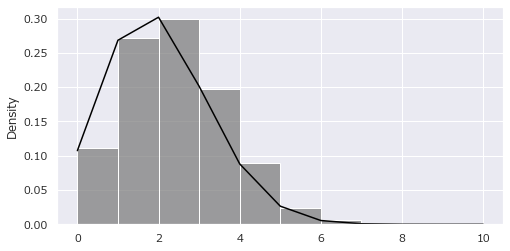

In [21]:
# シミュレーションで得られたヒストグラムと比較

# ヒストグラム(シミュレーション結果)
sns.histplot(binomial_result_array, 
             bins=np.arange(0, 11, 1), 
             stat='density', color='gray')

# 折れ線グラフ(二項分布の確率質量関数)
sns.lineplot(x=n_success, y=probs, 
             data=probs_df, color='black')

#### さまざまな二項分布

In [22]:
# 参考(書籍には載っていないコードです。書籍本文中のグラフを作成するためのコードです)
# 成功回数が0～10回になる確率を各々計算

# 成功回数
n_success = np.arange(0, 11, 1)

# 確率
probs_01 = stats.binom.pmf(k=n_success, n=10, p=0.1)
probs_02 = stats.binom.pmf(k=n_success, n=10, p=0.2)
probs_05 = stats.binom.pmf(k=n_success, n=10, p=0.5)


# データフレームにまとめる
probs_df_2 = pd.DataFrame({
    'n_success': n_success,
    '成功確率0.1': probs_01,
    '成功確率0.2': probs_02,
    '成功確率0.5': probs_05,
})

print(probs_df_2.head(3))

   n_success   成功確率0.1   成功確率0.2   成功確率0.5
0          0  0.348678  0.107374  0.000977
1          1  0.387420  0.268435  0.009766
2          2  0.193710  0.301990  0.043945


<AxesSubplot:xlabel='n_success'>

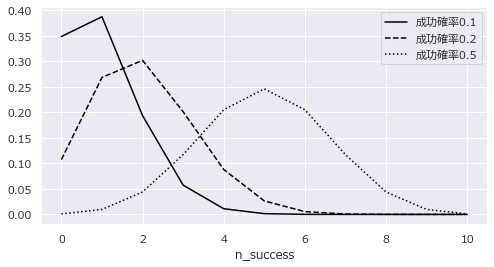

In [23]:
# 参考(書籍には載っていないコードです。書籍本文中のグラフを作成するためのコードです)
probs_df_2.plot(x='n_success', style=['-', '--', ':'], color='black')

### 実装：二項分布に従う乱数の生成

In [24]:
# N=10,p=0.2の二項分布に従う乱数を5個生成
np.random.seed(1)
stats.binom.rvs(n=10, p=0.2, size=5)

array([2, 3, 0, 1, 1])

### 実装：二項分布の期待値と分散

#### 二項分布の期待値の実装

In [25]:
n = 10
p = 0.2
x_bar = np.mean(binomial_result_array)

print('乱数の平均　　：', round(x_bar, 1))
print('理論的な期待値：', n * p)

乱数の平均　　： 2.0
理論的な期待値： 2.0


In [26]:
# 理論的な期待値
stats.binom.mean(n=10, p=0.2)

2.0

#### 二項分布の分散の実装

In [27]:
u2 = np.var(binomial_result_array, ddof=1)
print('乱数の分散　：', round(u2, 1))
print('理論的な分散：', n * p * (1 - p))

乱数の分散　： 1.6
理論的な分散： 1.6


In [28]:
# 理論的な分散
stats.binom.var(n=10, p=0.2)

1.6

### 実装：二項分布の累積分布関数

#### 二項分布の累積分布関数の実装

In [29]:
# 二項分布の累積分布関数
# (成功確率p=0.2、ベルヌーイ試行の回数n=10、成功回数2回以下)
round(stats.binom.cdf(k=2, n=10, p=0.2), 3)

0.678

#### 確率質量関数と累積分布関数の比較

In [30]:
# 成功回数が0のときの比較
print('確率質量関数', round(stats.binom.pmf(k=0, n=10, p=0.2), 3))
print('累積分布関数', round(stats.binom.cdf(k=0, n=10, p=0.2), 3))

確率質量関数 0.107
累積分布関数 0.107


In [31]:
# 成功回数が1のときの比較
print('確率質量関数', round(stats.binom.pmf(k=1, n=10, p=0.2), 3))
print('累積分布関数', round(stats.binom.cdf(k=1, n=10, p=0.2), 3))

確率質量関数 0.268
累積分布関数 0.376


In [32]:
# 確率質量関数から累積分布関数を求める
pmf_0 = stats.binom.pmf(k=0, n=10, p=0.2)
pmf_1 = stats.binom.pmf(k=1, n=10, p=0.2)
round(pmf_0 + pmf_1, 3)

0.376

### 実装：二項分布のパーセント点

In [33]:
# 二項分布のパーセント点
# 成功確率p=0.2、ベルヌーイ試行の回数n=10
print('10%点：', stats.binom.ppf(q=0.1, n=10, p=0.2))
print('20%点：', stats.binom.ppf(q=0.2, n=10, p=0.2))
print('50%点：', stats.binom.ppf(q=0.5, n=10, p=0.2))
print('80%点：', stats.binom.ppf(q=0.8, n=10, p=0.2))
print('95%点：', stats.binom.ppf(q=0.95, n=10, p=0.2))

10%点： 0.0
20%点： 1.0
50%点： 2.0
80%点： 3.0
95%点： 4.0


### 実装：二項分布の上側確率

In [34]:
# 4より上
round(1 - stats.binom.cdf(k=4, n=10, p=0.2), 3)

0.033

In [35]:
round(stats.binom.sf(k=4, n=10, p=0.2), 3)

0.033